In [ ]:
# Importar las librerías necesarias para análisis de datos y visualización
import pandas as pd  # Para manejo de datos en tablas (DataFrames)
import numpy as np   # Para operaciones numéricas y arrays

import matplotlib.pyplot as plt  # Para crear gráficos
import seaborn as sns           # Para visualizaciones estadísticas más elegantes

# Cargar el dataset de vinos desde el archivo CSV
df = pd.read_csv("WineQT.csv")
df.head()  # Mostrar las primeras 5 filas para ver cómo se ve el dataset

# Explorar la estructura del dataset
df.info()       # Ver tipos de datos, valores no nulos y memoria usada
df.describe()   # Obtener estadísticas descriptivas (media, std, min, max, etc.)
df.isnull().sum()  # Contar cuántos valores faltantes hay en cada columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [ ]:
# Eliminar la columna "Id" si existe, ya que no aporta información para el modelo
# Es solo un identificador único y no tiene valor predictivo
if "Id" in df.columns:
    df = df.drop(columns=["Id"])

df.head()  # Verificar que la columna fue eliminada

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Crear una función para convertir la calidad del vino en categorías
# Convertimos el problema de regresión a clasificación en 3 clases
def quality_label(q):
    if q <= 5:
        return 1   # Clase 1: calidad baja (vinos con puntuación 3, 4, 5)
    elif q == 6:
        return 2   # Clase 2: calidad media (vinos con puntuación 6)
    else:
        return 3   # Clase 3: calidad alta (vinos con puntuación 7, 8, 9)

# Aplicar la función a la columna "quality" y crear nueva columna "Quality"
df["Quality"] = df["quality"].apply(quality_label)

# Mostrar cuántos vinos hay en cada categoría de calidad
df["Quality"].value_counts()

Quality
1    522
2    462
3    159
Name: count, dtype: int64

In [ ]:
# Separar las características (X) de la variable objetivo (y)
# X contiene todas las características químicas del vino (features)
X = df.drop(columns=["quality", "Quality"])  # Eliminamos las columnas de calidad
# y contiene las etiquetas de clase (1, 2 o 3) que queremos predecir
y = df["Quality"]

# Mostrar las primeras filas de X e y para verificar la separación
X.head(), y.head()

(   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0            7.4              0.70         0.00             1.9      0.076   
 1            7.8              0.88         0.00             2.6      0.098   
 2            7.8              0.76         0.04             2.3      0.092   
 3           11.2              0.28         0.56             1.9      0.075   
 4            7.4              0.70         0.00             1.9      0.076   
 
    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 0                 11.0                  34.0   0.9978  3.51       0.56   
 1                 25.0                  67.0   0.9968  3.20       0.68   
 2                 15.0                  54.0   0.9970  3.26       0.65   
 3                 17.0                  60.0   0.9980  3.16       0.58   
 4                 11.0                  34.0   0.9978  3.51       0.56   
 
    alcohol  
 0      9.4  
 1      9.8  
 2      9.8  
 3      9.8  
 4

In [ ]:
# Normalizar las características para que todas tengan la misma escala
# Esto es importante porque algunas características pueden tener valores muy grandes
# y otras muy pequeños, lo que afectaría el rendimiento del modelo
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Crea el escalador (media=0, desviación estándar=1)
X_scaled = pd.DataFrame(
    scaler.fit_transform(X),  # Calcula media/std y transforma los datos
    columns=X.columns         # Mantiene los nombres de las columnas
)

# Verificar que los datos fueron escalados correctamente
X_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382
1,-0.292593,1.941813,-1.365027,0.050060,0.234247,0.915920,0.643477,0.036165,-0.708928,0.130881,-0.593601
2,-0.292593,1.273492,-1.161568,-0.171289,0.107253,-0.060071,0.246745,0.140103,-0.325775,-0.045254,-0.593601
3,1.653789,-1.399789,1.483400,-0.466421,-0.252560,0.135127,0.429852,0.659792,-0.964363,-0.456235,-0.593601
4,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382


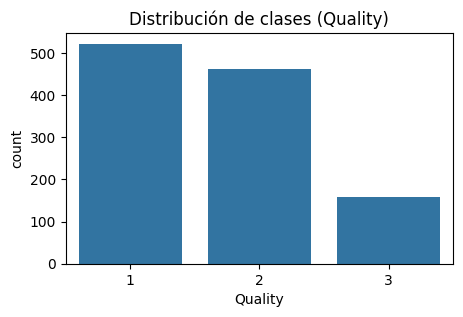

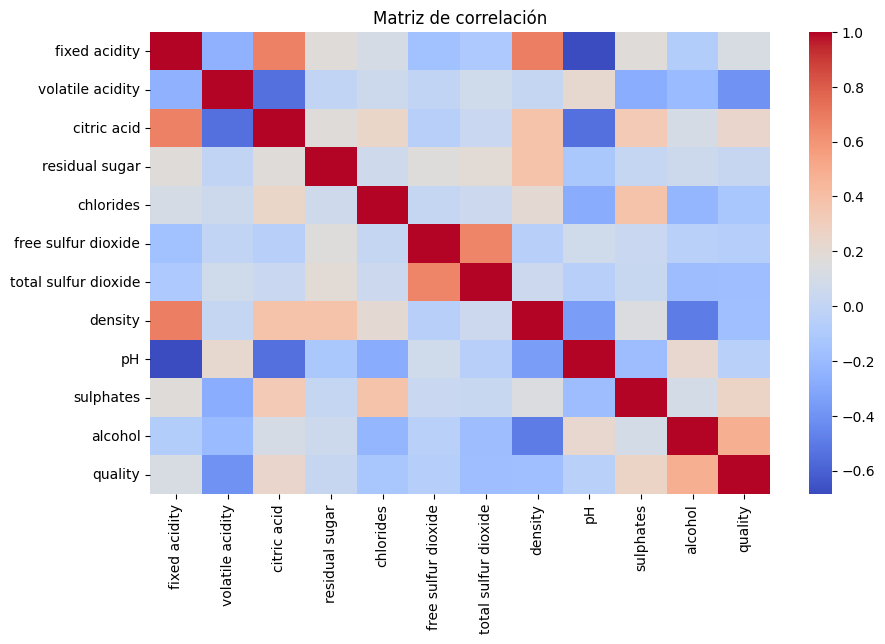

In [ ]:
# Visualizar la distribución de las clases de calidad
plt.figure(figsize=(5,3))
sns.countplot(x=y)  # Gráfico de barras con el conteo de cada clase
plt.title("Distribución de clases (Quality)")
plt.show()

# Crear un mapa de calor para ver las correlaciones entre características
# Esto ayuda a identificar qué variables están relacionadas entre sí
plt.figure(figsize=(10,6))
sns.heatmap(df.drop(columns=["Quality"]).corr(), cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

In [ ]:
# Mostrar las dimensiones del dataset usando notación matemática
n, m = X_scaled.shape  # n = número de filas (muestras), m = número de columnas (características)
print(f"X ∈ R^({n} × {m})")  # X pertenece al espacio R^(n×m) - una matriz de n filas y m columnas
print("y ∈ {1, 2, 3}")  # y toma valores en el conjunto {1, 2, 3} - las 3 clases de calidad

X ∈ R^(1143 × 11)
y ∈ {1, 2, 3}


In [ ]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
# Esto nos permite entrenar el modelo con una parte de los datos
# y evaluar su rendimiento con datos que nunca ha visto
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,      # Datos escalados y etiquetas
    test_size=0.2,    # 20% para prueba, 80% para entrenamiento
    stratify=y,       # Mantiene la misma proporción de clases en ambos conjuntos
    random_state=42   # Semilla para reproducibilidad
)

In [ ]:
# Crear y entrenar un modelo de Regresión Logística
# Aunque se llama "regresión", realmente es un algoritmo de clasificación
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=2000,           # Número máximo de iteraciones para que converja
    multi_class="auto",      # Maneja automáticamente clasificación multiclase
    random_state=42          # Semilla para reproducibilidad
)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

c:\Users\luisa\OneDrive\Documentos\Universidad\Aprendizaje automatico\Cilco dataset\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,2000
,multi_class,'auto'


In [ ]:
# Evaluar el modelo con el conjunto de prueba
# Generamos predicciones y mostramos métricas detalladas de rendimiento
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)  # Hacer predicciones en los datos de prueba
# El reporte muestra: precisión, recall, f1-score y support para cada clase
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.75      0.80      0.77       105
           2       0.59      0.59      0.59        92
           3       0.40      0.31      0.35        32

    accuracy                           0.65       229
   macro avg       0.58      0.57      0.57       229
weighted avg       0.64      0.65      0.64       229



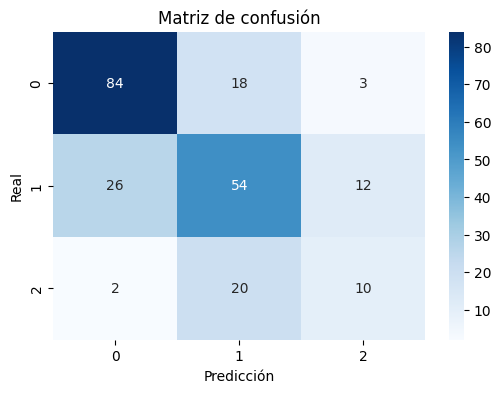

In [ ]:
# Crear y visualizar la matriz de confusión
# Muestra cuántas predicciones fueron correctas e incorrectas para cada clase
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)  # Calcular la matriz de confusión

# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")  # annot=True muestra los números
plt.xlabel("Predicción")  # Lo que el modelo predijo
plt.ylabel("Real")         # Lo que realmente era
plt.title("Matriz de confusión")
plt.show()

In [ ]:
# Calcular y mostrar la precisión (accuracy) del modelo
# Es el porcentaje de predicciones correctas sobre el total
print("Accuracy:", model.score(X_test, y_test))

Accuracy: 0.6462882096069869
